In [16]:

import tensorflow as tf
from tensorflow import keras

#Importing tensorflow libs
from keras.preprocessing.image import ImageDataGenerator #image generator label data based on the dir the image in contained in
from keras.optimizers import RMSprop, Adam
from keras.losses import SparseCategoricalCrossentropy as SCC
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Rescaling, RandomFlip, RandomRotation, RandomZoom, CenterCrop
from keras.utils import image_dataset_from_directory

#Confusion Matrix Libs
from sklearn.metrics import confusion_matrix
import itertools

#Importing general libs
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
import pathlib
import os
import random
import shutil

In [2]:
train_dir='/Users/futuregadgetlab/Downloads/ai_art_classification/train/'
batch_size = 16
IMG_HEIGHT = 128 
IMG_WIDTH = 128
epochs = 15

In [5]:


train_datagen = image_dataset_from_directory(
                                                        train_dir,
                                                        labels = 'inferred',
                                                        label_mode = 'int',
                                                        class_names=['AI_GENERATED','NON_AI_GENERATED'],
                                                        color_mode='rgb',
                                                        batch_size= batch_size,
                                                        image_size= (IMG_HEIGHT,IMG_WIDTH),
                                                        shuffle= True,
                                                        seed= 42,
                                                        validation_split = 0.3,
                                                        subset='training',
    )

val_datagen = image_dataset_from_directory(
                                                        train_dir,
                                                        labels = 'inferred',
                                                        label_mode = 'int',
                                                        class_names=['AI_GENERATED','NON_AI_GENERATED'],
                                                        color_mode='rgb',
                                                        batch_size= batch_size,
                                                        image_size= (IMG_HEIGHT,IMG_WIDTH),
                                                        shuffle= True,
                                                        seed= 42,
                                                        validation_split = 0.3,
                                                        subset='validation',
    )

Found 18618 files belonging to 2 classes.
Using 13033 files for training.
Found 18618 files belonging to 2 classes.
Using 5585 files for validation.


# 0 - AI Generated 1- Human

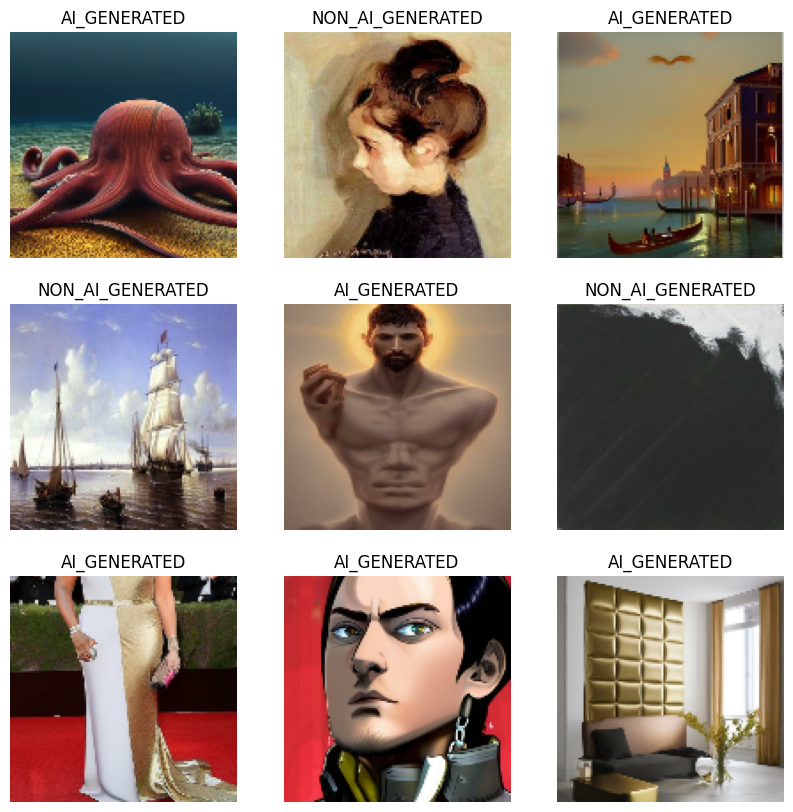

In [6]:
class_names = train_datagen.class_names
plt.figure(figsize=(10, 10))
for images, labels in train_datagen.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [8]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_datagen.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_datagen.cache().prefetch(buffer_size=AUTOTUNE)

In [9]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss',min_delta=0.01, patience=3)

In [10]:
model = Sequential([
        #PreProcessing
        Rescaling(scale = 1./255),
        CenterCrop(IMG_HEIGHT, IMG_WIDTH),
        #Augmentation
        RandomFlip("horizontal"),
        RandomRotation(0.1),
        RandomZoom(0.3),
        Conv2D(filters=32, 
                 kernel_size=3, 
                 strides=1,
                 padding='SAME',
                 activation='relu', 
                 input_shape=(IMG_HEIGHT,IMG_WIDTH, 3)
                 ),
        
        Conv2D(filters=32, 
                 kernel_size=3,
                 strides=1, 
                 #padding='SAME',
                 activation='relu', 
                 ),
        MaxPooling2D(pool_size=2, strides=2),
        Dropout(0.4),
        
        Conv2D(filters=64, 
                 kernel_size=5,
                 strides=1, 
                 padding='SAME',
                 activation='relu', 
                 ),
        
        Conv2D(filters=64, 
                 kernel_size=7,
                 strides=1, 
                 #padding='SAME',
                 activation='relu', 
                 ),
        MaxPooling2D(pool_size=2, strides=2),
        Dropout(0.4),

        Conv2D(filters=128, 
                 kernel_size=5,
                 strides=1, 
                 padding='SAME',
                 activation='relu', 
                 ),
        
        Conv2D(filters=128, 
                 kernel_size=7,
                 strides=1, 
                 #padding='SAME',
                 activation='relu', 
                 ),
        MaxPooling2D(pool_size=2, strides=2),
        Dropout(0.4),

        Flatten(),
        Dropout(0.4),
        Dense(256,activation = 'relu'),
        Dense(2, activation = 'softmax')
])



In [18]:
model.compile(
    loss = SCC(from_logits=True),
    optimizer = 'adam',
    metrics = ['accuracy'],
)

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 center_crop (CenterCrop)    (None, 128, 128, 3)       0         
                                                                 
 random_flip (RandomFlip)    (None, 128, 128, 3)       0         
                                                                 
 random_rotation (RandomRot  (None, 128, 128, 3)       0         
 ation)                                                          
                                                                 
 random_zoom (RandomZoom)    (None, 128, 128, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                        

In [20]:
history = model.fit(
    train_datagen,
    epochs = epochs,
    validation_data= val_datagen,
    callbacks = [callback]
)

Epoch 1/15


/Users/futuregadgetlab/venv-metal/lib/python3.9/site-packages/keras/src/backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


815/815 [==============================] - 145s 176ms/step - loss: 0.6864 - accuracy: 0.5597 - val_loss: 0.6912 - val_accuracy: 0.5436
Epoch 2/15
815/815 [==============================] - 145s 178ms/step - loss: 0.6863 - accuracy: 0.5597 - val_loss: 0.6908 - val_accuracy: 0.5436
Epoch 3/15
815/815 [==============================] - 152s 186ms/step - loss: 0.6864 - accuracy: 0.5597 - val_loss: 0.6909 - val_accuracy: 0.5436
Epoch 4/15
815/815 [==============================] - 148s 182ms/step - loss: 0.7070 - accuracy: 0.5590 - val_loss: 0.6910 - val_accuracy: 0.5436


ValueError: x and y must have same first dimension, but have shapes (15,) and (4,)

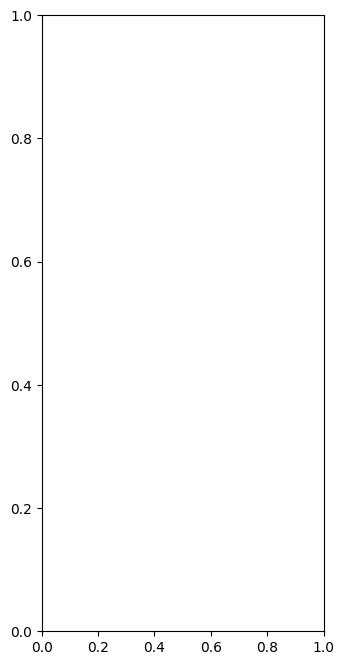

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [27]:
# Note : This is a boilerplate for how to used transfer learning with your own dataset
# Fell free to change the parameter according to your use cases
# For more visit : https://keras.io/api/applications/
import tensorflow as tf
from keras.models import Sequential
from tensorflow.keras import layers
from keras.layers import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Concatenate,Embedding,Dropout,Flatten
from keras.applications.resnet50 import ResNet50


# Minimum Image size required by InceptionV3 is 75 X 75
conv_base=ResNet50(weights='imagenet',include_top=False,input_shape=(IMG_HEIGHT, IMG_WIDTH,3))
# This code will prevent the model to retrain the imagenet wight
for layer in conv_base.layers:
    layer.trainable=False




classifier = Sequential()
classifier.add(conv_base)
classifier.add(Flatten())
classifier.add(Dropout(.4))
classifier.add(Dense(64,activation='relu'))
classifier.add(BatchNormalization())
classifier.add(Dense('2',activation='softmax'))
classifier.add(BatchNormalization())


classifier.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


train_data = ImageDataGenerator(rescale=1. / 255)
test_data = ImageDataGenerator(rescale=1./255)


training_set = train_data.flow_from_directory(train_dir,target_size=(IMG_WIDTH,IMG_HEIGHT))
test_set = train_data.flow_from_directory('/Users/futuregadgetlab/Downloads/ai_art_classification/test',target_size=(IMG_WIDTH,IMG_HEIGHT))
history = classifier.fit(training_set,epochs=10,steps_per_epoch =500,validation_data = test_set,validation_steps=50,shuffle=True,verbose=1)
history.save('model_8_1_1_class.h5')
print(test_set.class_indices)
print('Saved model to disk')

Found 18618 images belonging to 2 classes.
Found 0 images belonging to 0 classes.
Epoch 1/10
500/500 [==============================] - 60s 116ms/step - loss: 0.0141 - accuracy: 0.5526
Epoch 2/10
500/500 [==============================] - 68s 136ms/step - loss: 1.1921e-07 - accuracy: 0.5561
Epoch 3/10
500/500 [==============================] - 70s 141ms/step - loss: 1.1921e-07 - accuracy: 0.5542
Epoch 4/10
500/500 [==============================] - 76s 152ms/step - loss: 1.1921e-07 - accuracy: 0.5535
Epoch 5/10
500/500 [==============================] - 73s 145ms/step - loss: 1.1921e-07 - accuracy: 0.5535
Epoch 6/10
500/500 [==============================] - 74s 148ms/step - loss: 1.1921e-07 - accuracy: 0.5553
Epoch 7/10
500/500 [==============================] - 74s 148ms/step - loss: 1.1921e-07 - accuracy: 0.5530
Epoch 8/10
500/500 [==============================] - 75s 149ms/step - loss: 1.1921e-07 - accuracy: 0.5529
Epoch 9/10
500/500 [==============================] - 82s 163ms/st

AttributeError: 'History' object has no attribute 'save'